In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

In [2]:
covid = pd.read_csv('covid1.csv', sep=';')

In [3]:
covid.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
covid_sp = covid[covid['estado'] == 'SP']

In [5]:
covid_sp.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
1672,Sudeste,SP,2020-01-30,0,0,0,0
1673,Sudeste,SP,2020-01-31,0,0,0,0
1674,Sudeste,SP,2020-02-01,0,0,0,0
1675,Sudeste,SP,2020-02-02,0,0,0,0
1676,Sudeste,SP,2020-02-03,0,0,0,0


In [6]:
acumulados = covid_sp['casosAcumulados']

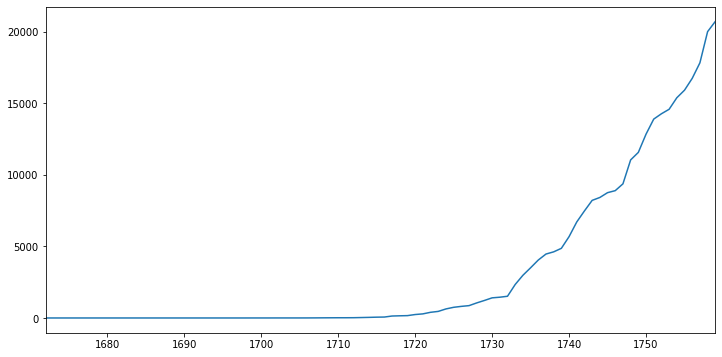

In [7]:
plt.figure(figsize=(12,6))
acumulados.plot()

In [ ]:
série['data'] = pd.DataFrame(covid_sp['data'])

In [ ]:
série.set_index('data', inplace=True)

In [ ]:
plt.figure(figsize=(10,10))
série.plot()

In [ ]:
novos = covid_sp['casosNovos']

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
casos_novos = pd.DataFrame(covid_sp['casosNovos'])

In [12]:
casos_novos['data'] = pd.DataFrame(covid_sp['data'])

In [13]:
casos_novos.head()

,casosNovos,data
1672,0,2020-01-30
1673,0,2020-01-31
1674,0,2020-02-01
1675,0,2020-02-02
1676,0,2020-02-03


In [14]:
casos_novos.set_index('data', inplace=True)

In [15]:
casos_novos.head()

,casosNovos
data,
2020-01-30,0
2020-01-31,0
2020-02-01,0
2020-02-02,0
2020-02-03,0


<Figure size 864x432 with 0 Axes>

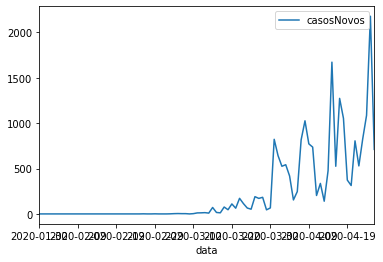

In [17]:
plt.figure(figsize=(12,6))
casos_novos.plot()

In [18]:
model = pm.auto_arima(casos_novos, start_p=1, start_q=1, max_p=6, max_q=6, seasonal=False, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1227.857, BIC=1237.721, Time=0.641 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1258.390, BIC=1263.321, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1243.413, BIC=1250.811, Time=0.013 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1227.712, BIC=1235.109, Time=0.072 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1256.444, BIC=1258.910, Time=0.016 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1227.871, BIC=1237.735, Time=0.172 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1231.715, BIC=1244.045, Time=0.172 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.260 seconds


In [52]:
pred = model.predict(n_periods=10)

In [39]:
novos = casos_novos['casosNovos']

In [56]:
from pmdarima import model_selection

In [59]:
train, test = model_selection.train_test_split(casos_novos, train_size=70)

In [60]:
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=False,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [61]:
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

In [62]:
preds

array([1019.26319864,  889.07789646,  715.91983036,  584.8423404 ,
        548.67106647,  611.08292995,  733.37057759,  858.01622396,
        936.24233194,  947.19476726,  902.04890252,  833.85215367,
        779.82100711,  764.86948775,  793.13820821,  849.75776412,
        910.36654734,  953.03804236])

In [65]:
x_axis = np.arange(train.shape[0] + preds.shape[0])

In [73]:
x_years = casos_novos.index  # period starts at january 2020

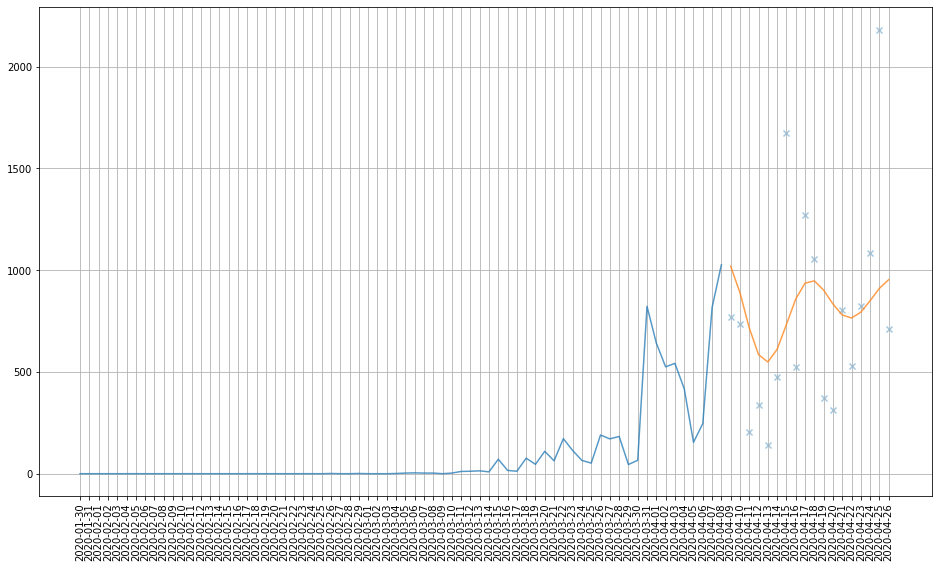

In [81]:
plt.figure(figsize=(16,9))
plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()

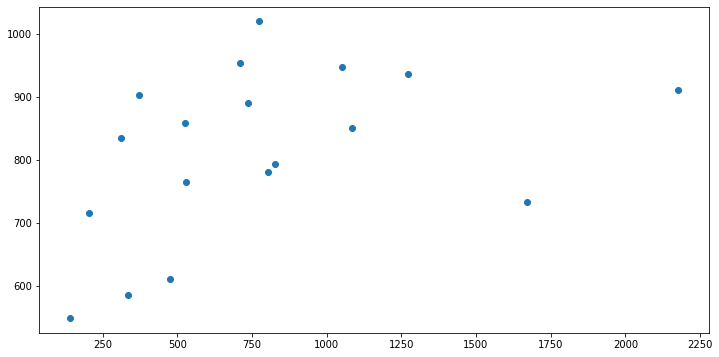

In [83]:
plt.figure(figsize=(12,6))
plt.scatter(test, preds)

In [84]:
from sklearn.metrics import mean_squared_error

In [86]:
print(mean_squared_error(test, preds))

224510.0825098193


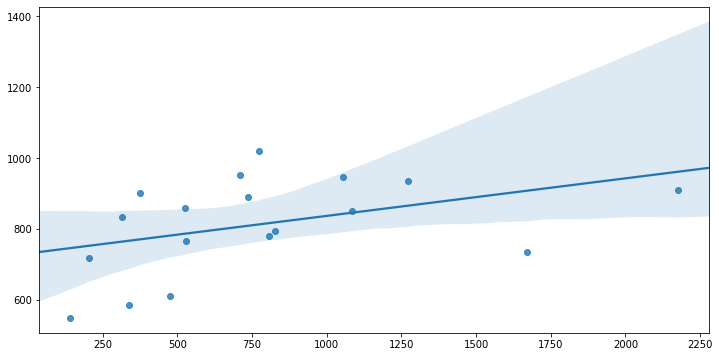

In [89]:
plt.figure(figsize=(12,6))
sns.regplot(test, preds)